In [1]:
import pandas as pd
from StringIO import StringIO
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from IPython.display import display, display_html, display_markdown
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
matplotlib.rc('axes', labelsize=20) 
matplotlib.rc('legend', fontsize=15) 
matplotlib.rc('legend', framealpha=1)
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

import locale
locale.setlocale(locale.LC_ALL, 'en_US')

%matplotlib inline

In [20]:
# run scp lxplus:/afs/cern.ch/atlas/www/GROUPS/DATAPREPARATION/DataSummary/2015/daydata/daytable.csv daytable_2015.csv

In [42]:
def remove_whitespace_file(filename):
    import fileinput
    f = fileinput.FileInput(filename, inplace=True, backup='.bak')

    for line in f:
        print(line.replace(', ', ',')),
    f.close()

In [62]:
files_lumi_pp = {2015: 'daytable_2015.csv'}

data_lumi = {}
for year, filename in files_lumi_pp.iteritems():
    remove_whitespace_file(filename)
    lumi_data = pd.read_csv(filename, parse_dates=["Day"])
    data_lumi[year] = lumi_data

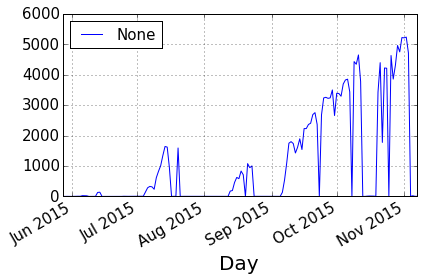

In [63]:
data_lumi[2015].plot(y='LPeakAll', x='Day')

## Import data

In [5]:
data = {}

for year, filename in (2011, "trips_2011.txt"), (2012, "trips_2012.txt"), (2015, "trips_2015.txt"):
    data[year] = pd.read_table(filename, parse_dates=["Trip TimeStamp"], index_col=["TripId"], usecols=["TripId", "Trip TimeStamp", "Stable Beams", "Module", "Channel", "Det", "Side"])
    data[year]["channel_id"] = data[year].apply(lambda x: "M" + str(x["Module"]) + "C" + str(x["Channel"]), axis=1)
    display_html("<h2>head of %d data</h2>" % year, raw=True)
    display(data[year].head())
    
data = pd.concat(data, names=['year'])

head of 2011 data

,Trip TimeStamp,Stable Beams,Module,Channel,Det,Side,channel_id
TripId,,,,,,,
563,2011-11-27 00:44:33,Y,49,1,HEC,A,M49C1
562,2011-11-11 08:38:31,N,158,6,HEC,C,M158C6
561,2011-11-10 13:31:49,N,317,15,EMECPS,C,M317C15
560,2011-10-30 07:23:52,N,74,7,HEC,A,M74C7
559,2011-10-29 03:05:22,N,69,4,HEC,A,M69C4


head of 2012 data

,Trip TimeStamp,Stable Beams,Module,Channel,Det,Side,channel_id
TripId,,,,,,,
383,2013-02-06 06:43:19,Y,78,7,HEC,A,M78C7
382,2013-02-06 04:22:53,N,78,7,HEC,A,M78C7
381,2013-02-05 17:19:33,N,78,7,HEC,A,M78C7
380,2013-01-24 10:31:38,N,240,11,EMB,C,M240C11
379,2013-01-23 12:27:22,Y,224,14,EMB,A,M224C14


head of 2015 data

,Trip TimeStamp,Stable Beams,Module,Channel,Det,Side,channel_id
TripId,,,,,,,
91,2015-11-13 20:07:57,N,150,9,HEC,C,M150C9
90,2015-11-04 09:48:54,N,66,13,HEC,A,M66C13
89,2015-11-04 08:32:19,N,58,0,HEC,A,M58C0
88,2015-11-03 01:09:43,Y,167,6,HEC,C,M167C6
87,2015-11-03 01:02:48,Y,161,3,HEC,C,M161C3


## Most tripped channels

In [6]:
display_markdown("### all years\n ----", raw=True)
display(data["channel_id"].value_counts().head().to_frame(name="# trips"))
for year, data_year in data.groupby(level='year'):
    display_markdown("### %d\n ----" % year, raw=True)
    display(data_year["channel_id"].value_counts().head().to_frame(name="# trips"))

### all years
 ----

,# trips
M142C11,18
M132C3,17
M66C13,13
M102C1,12
M48C9,11


### 2011
 ----

,# trips
M142C11,15
M102C1,10
M144C6,10
M31C4,9
M21C10,9


### 2012
 ----

,# trips
M132C3,17
M161C3,9
M30C10,6
M4C4,6
M8C4,6


### 2015
 ----

,# trips
M53C14,9
M48C9,6
M66C13,5
M124C6,4
M58C12,4


Det
EMB       1.111111
EMBPS     1.333333
EMEC      3.000000
EMECPS    1.000000
HEC       1.944444
dtype: float64

## Trips per detector

### 2011
 ----

#trips = 562, trips / day = 2.2
#trips with sb = 402 (71.53%)


,#trips,#trips SB,fraction SB (%),#tripped channels,#trips / #tripped ch
Det,,,,,
EMB,84,60,71.428571,74,1.135135
EMBPS,42,29,69.047619,24,1.750000
EMEC,296,216,72.972973,122,2.426230
EMECPS,20,16,80.000000,12,1.666667
HEC,120,81,67.500000,65,1.846154


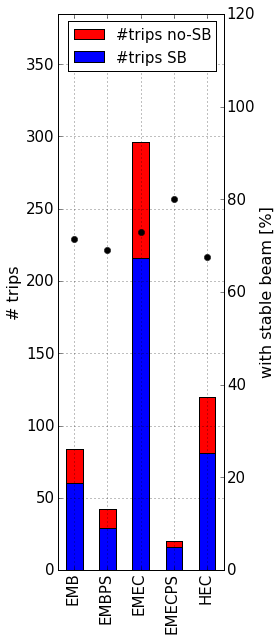

### 2012
 ----

#trips = 327, trips / day = 1.0
#trips with sb = 235 (71.87%)


,#trips,#trips SB,fraction SB (%),#tripped channels,#trips / #tripped ch
Det,,,,,
EMB,50,25,50.000000,41,1.219512
EMBPS,13,12,92.307692,8,1.625000
EMEC,116,88,75.862069,54,2.148148
EMECPS,23,19,82.608696,17,1.352941
HEC,125,91,72.800000,68,1.838235


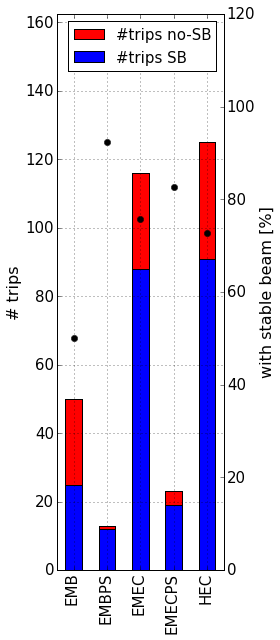

### 2015
 ----

#trips = 91, trips / day = 0.3
#trips with sb = 65 (71.43%)


,#trips,#trips SB,fraction SB (%),#tripped channels,#trips / #tripped ch
EMB,10,8,80.000000,9,1.111111
EMBPS,4,2,50.000000,3,1.333333
EMEC,6,2,33.333333,2,3.000000
EMECPS,1,NaN,NaN,1,1.000000
HEC,70,53,75.714286,36,1.944444


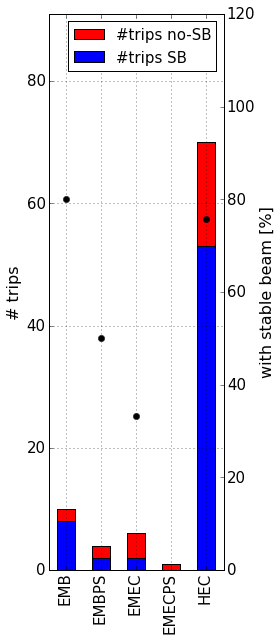

In [160]:
def show_sb_stat(data):
    fig, ax = plt.subplots(figsize=(4, 9))
    display_markdown("### %d\n ----" % year, raw=True)
    ax2 = ax.twinx()

    trips_per_det = data.groupby("Det")["Det"].count()    
    trips_per_det_sb = data[data["Stable Beams"] == 'Y'].groupby("Det")['channel_id'].count()
    tripped_per_det = data.groupby("Det")['channel_id'].unique().apply(len)
    ntrip_per_det = data.groupby("Det")["channel_id"].value_counts().mean(level='Det')
    
    j = pd.DataFrame(dict(trips_per_det = trips_per_det, trips_per_det_sb = trips_per_det_sb))
    sb_fraction = j.trips_per_det_sb / j.trips_per_det * 100
    sb_fraction.plot(marker = 'o', color='k', ls='', label='with stable beam [%]', ax=ax2)
    
    summary_table = pd.concat([trips_per_det, trips_per_det_sb, sb_fraction, tripped_per_det, ntrip_per_det], axis=1)
    summary_table.columns = ['#trips', '#trips SB', 'fraction SB (%)', '#tripped channels', '#trips / #tripped ch']
    
    import datetime
    times = data["Trip TimeStamp"].astype(datetime.datetime)
    days = (times.max() - times.min()).days
    print "#trips = %d, trips / day = %.1f" % (len(data), len(data) / float(days))
    trips_sb = (data['Stable Beams'] == 'Y').sum()
    print "#trips with sb = %d (%.2f%%)" % (trips_sb, trips_sb / float(len(data)) * 100)
    
    display(summary_table)

    j['trips_per_det'].plot(kind='bar', ax=ax, fc='r', label='#trips no-SB')
    j['trips_per_det_sb'].plot(kind='bar', ax=ax, label='#trips SB')

    ax2.grid(False)
    ax2.set_ylim(0, 120)
    ax2.set_ylabel('with stable beam [%]', fontsize=16)
    ax.set_ylim(0, trips_per_det.max() * 1.3)

    ax.set_xlabel('')
    ax.set_ylabel('# trips', fontsize=16)
    ax.legend()
    plt.show()

    fig.tight_layout()
    return fig

for year, data_year in data.groupby(level='year'):
    fig = show_sb_stat(data_year)
    for ext in "pdf", "png":
        fig.savefig("trip_sb_%d.%s" % (year, ext))

plt.show()

Show the probability to retrip. Plot the number of trips (red + blue) and number of tripped channels (blue)

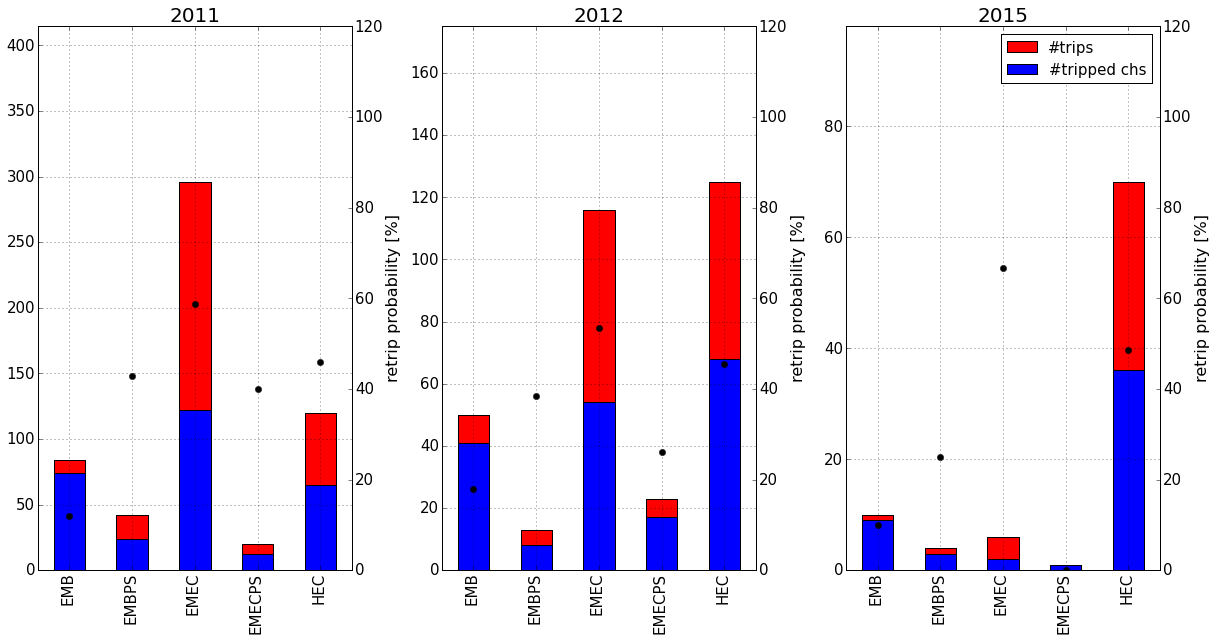

In [12]:
def show_retrip(data, ax):
    ax2 = ax.twinx()

    trips_per_det = data.groupby("Det")["Det"].count()
    tripped_per_det = data.groupby("Det")['channel_id'].unique().apply(len)

    j = pd.DataFrame(dict(trips_per_det = trips_per_det, tripped_per_det = tripped_per_det))
    retrip = (1. - j.tripped_per_det / j.trips_per_det) * 100

    retrip.plot(marker = 'o', color='k', ls='', label='retrip [%]', ax=ax2, zorder=100)
    j.trips_per_det.plot(kind='bar', ax=ax, fc='r', label='#trips')
    j.tripped_per_det.plot(kind='bar', ax=ax, label='#tripped chs')
    ax2.grid(False)
    ax2.set_ylim(0, 120)
    ax2.set_ylabel('retrip probability [%]', fontsize=16)
    ax.set_ylim(0, trips_per_det.max() * 1.4)
    ax.set_xlabel('')

fig, axs = plt.subplots(1, 3, figsize=(17, 9))

for ax, (year, data_year) in zip(axs.flat, data.groupby(level='year')):
    show_retrip(data_year, ax=ax)
    ax.set_title(str(year), fontsize=20)
ax.legend()
fig.tight_layout()
fig.savefig('retrip.png')
fig.savefig('retrip.pdf')
plt.show()

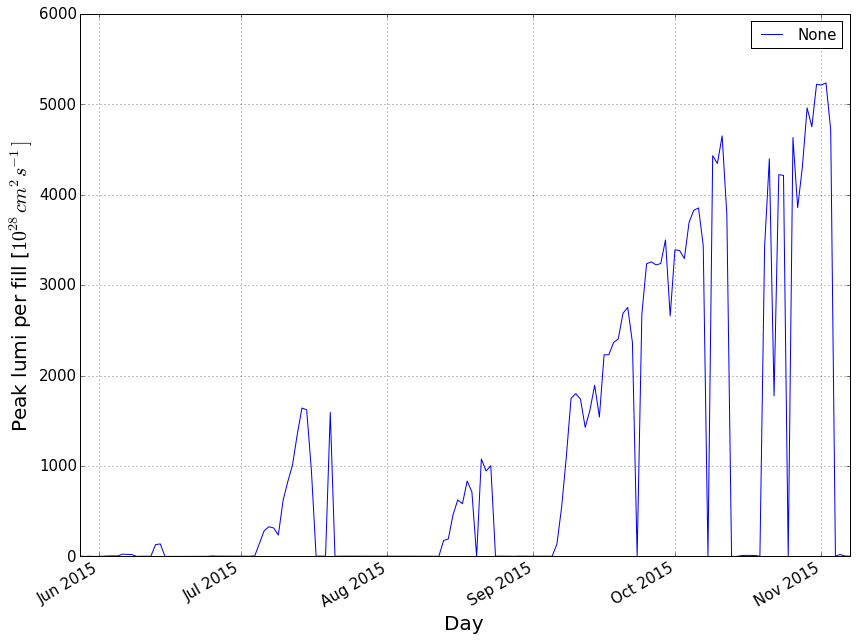

In [96]:
fig, ax = plt.subplots(figsize=(12, 9))
data_lumi[2015].plot(x='Day', y='LPeakAll', ax=ax)
ax.set_ylabel('Peak lumi per fill [$10^{28} cm^{2} s^{-1}]$')
fig.savefig('lumi_2015.pdf')

## Time evolution

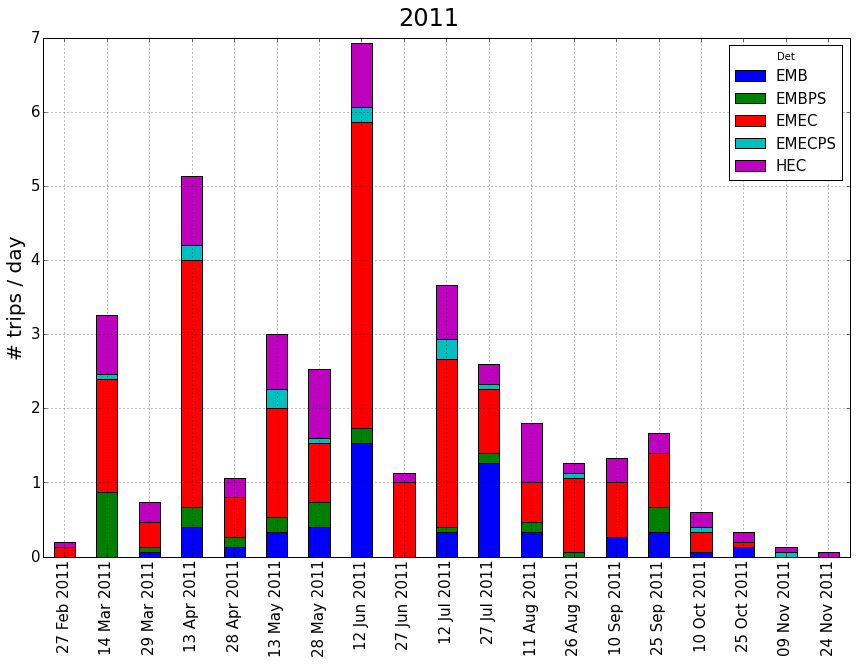

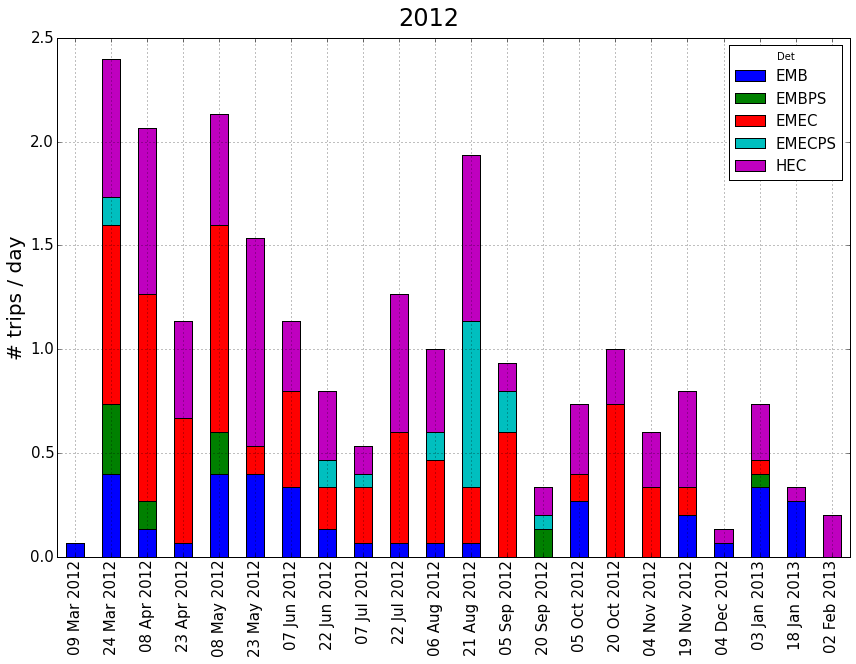

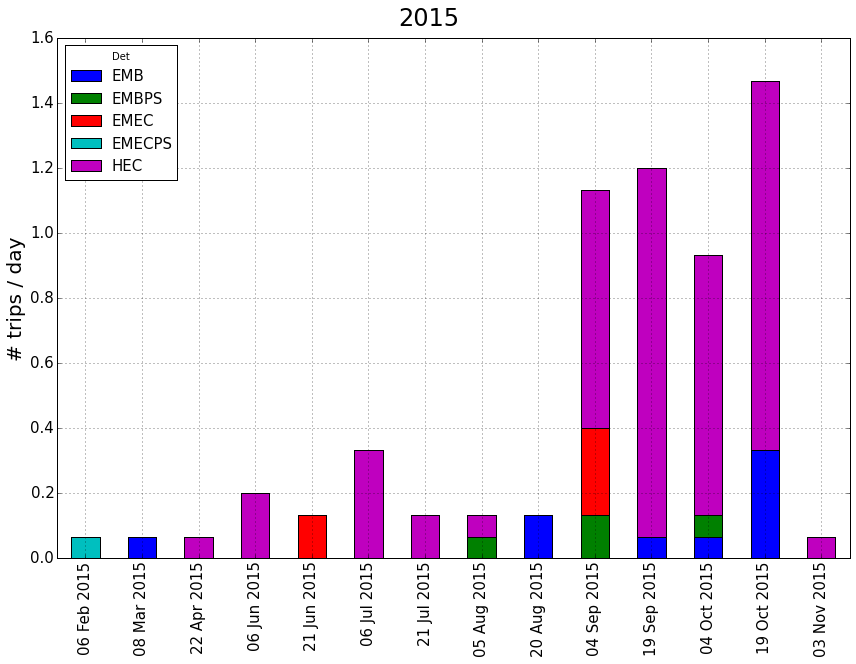

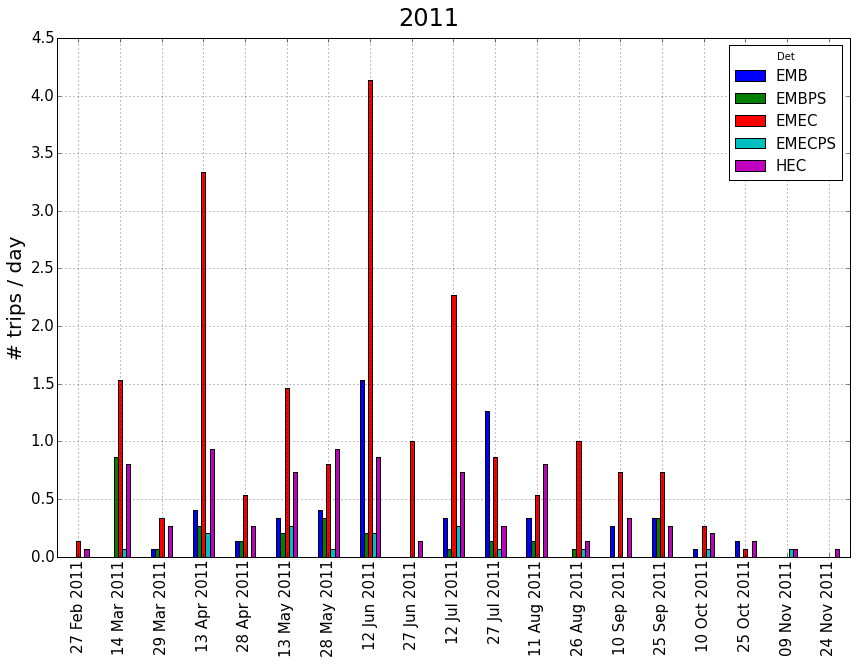

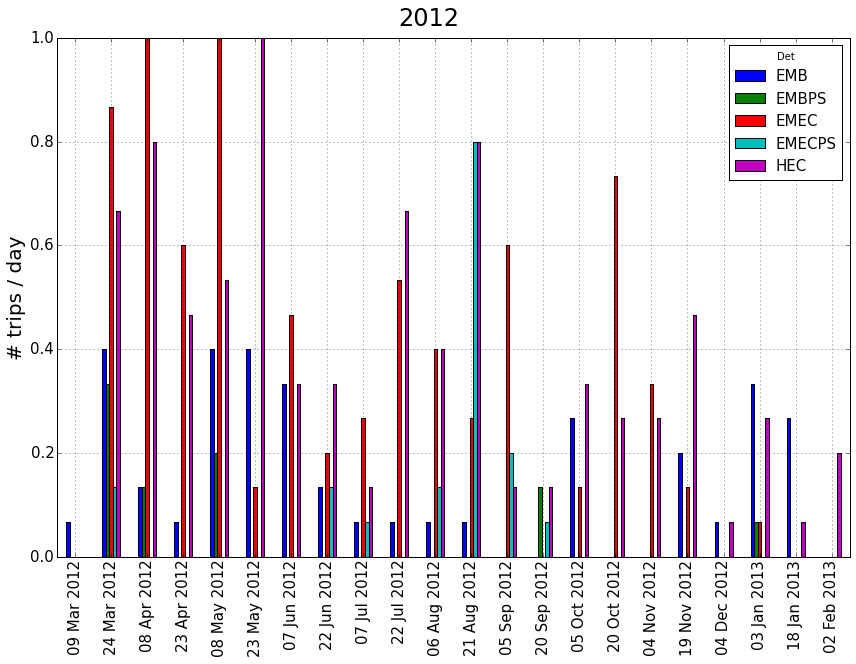

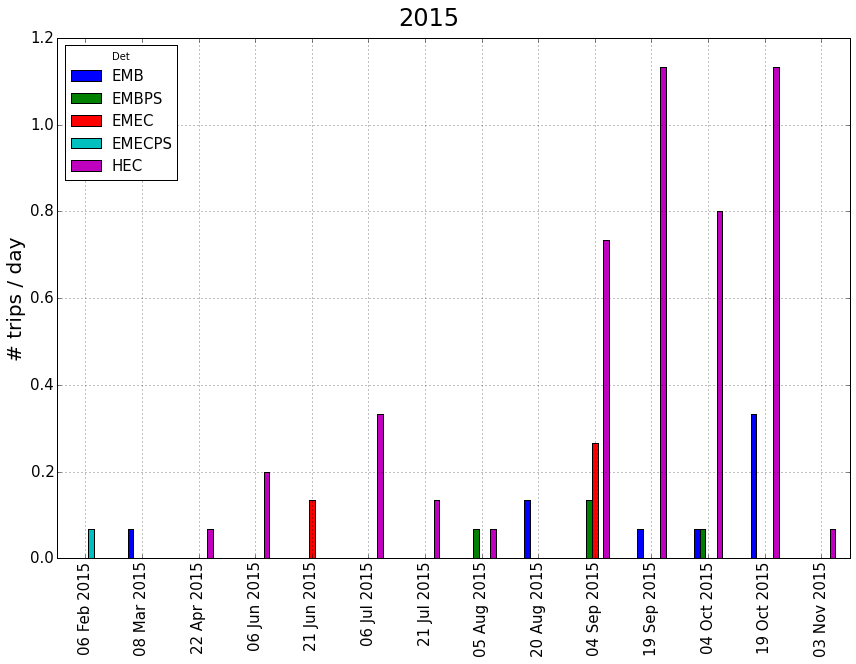

In [97]:
def plot_month(data, stacked, data_lumi=None):
    import matplotlib.dates as mdates

    months = mdates.MonthLocator()  # every month
    monthsFmt = mdates.DateFormatter('%Y')

    fig, ax = plt.subplots(figsize=(12, 9))
    
#    if data_lumi is not None:
#        ax2 = ax.twinx()
#        data_lumi.groupby(pd.Grouper(freq='15D', key='Day'))['LPeakAll'].mean().plot(ax = ax2)
#        #ax2.plot(data_lumi['Day'], data_lumi['LPeakAll'])
    
    dg = data.groupby([pd.Grouper(freq='15D',key='Trip TimeStamp', closed='right'), "Det"])["Det"].count().unstack()
    (dg / 15.).plot(kind='bar', ax=ax, stacked=stacked)
    ax.set_xticklabels([dt.strftime('%d %b %Y') for dt in dg.index])
    ax.set_ylabel("# trips / day")
    ax.set_xlabel("")
    
    
    
    fig.tight_layout()
    return fig

for year, data_year in data.groupby(level='year'):
    if year == 2015:
        fig = plot_month(data_year, stacked=True, data_lumi = data_lumi[2015])
    else:
        fig = plot_month(data_year, stacked=True)
    fig.suptitle(str(year), fontsize=24, y=1.02)

    for ext in "pdf", "png":
        fig.savefig("trips_%d.%s" % (year, ext))
        
for year, data_year in data.groupby(level='year'):
    fig = plot_month(data_year, stacked=False)
    fig.suptitle(str(year), fontsize=24, y=1.02)

    for ext in "pdf", "png":
        fig.savefig("trips_%d_notstacked.%s" % (year, ext))

plt.show()

### All years together

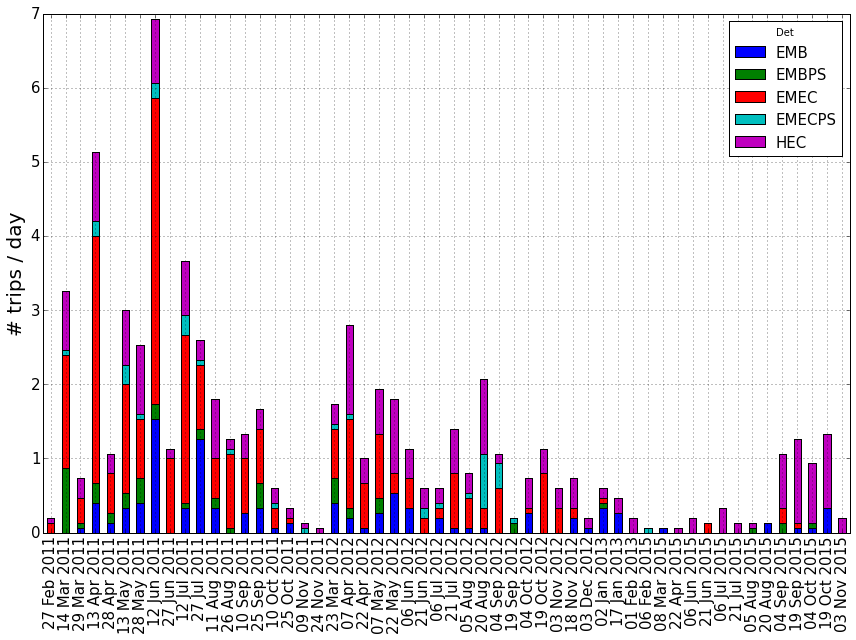

In [14]:
fig = plot_month(data, True)
fig.savefig('trips_allyear.pdf')
fig.savefig('trips_allyear.png')
plt.show()

## Grouped by hours

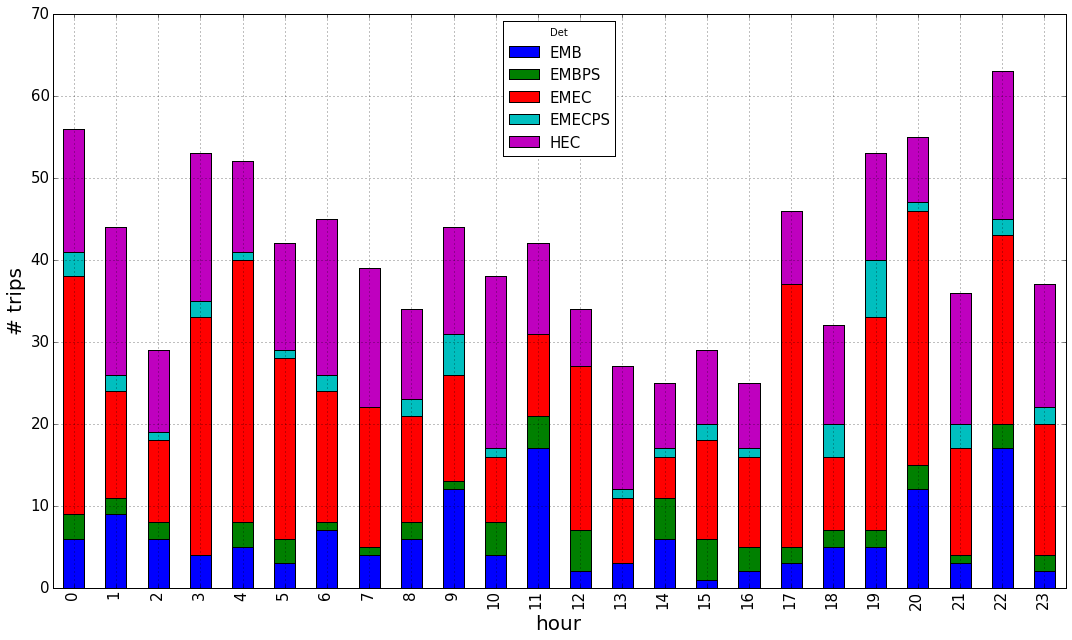

In [15]:
times = pd.DatetimeIndex(data["Trip TimeStamp"])
dg = data.groupby([times.hour, "Det"])["Det"].count().unstack()

import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(15, 9))
dg.plot(kind='bar', ax=ax, stacked=True)
ax.set_ylabel("# trips")
ax.set_xlabel("hour")
fig.tight_layout()
plt.show()

## Grouped by weekdays

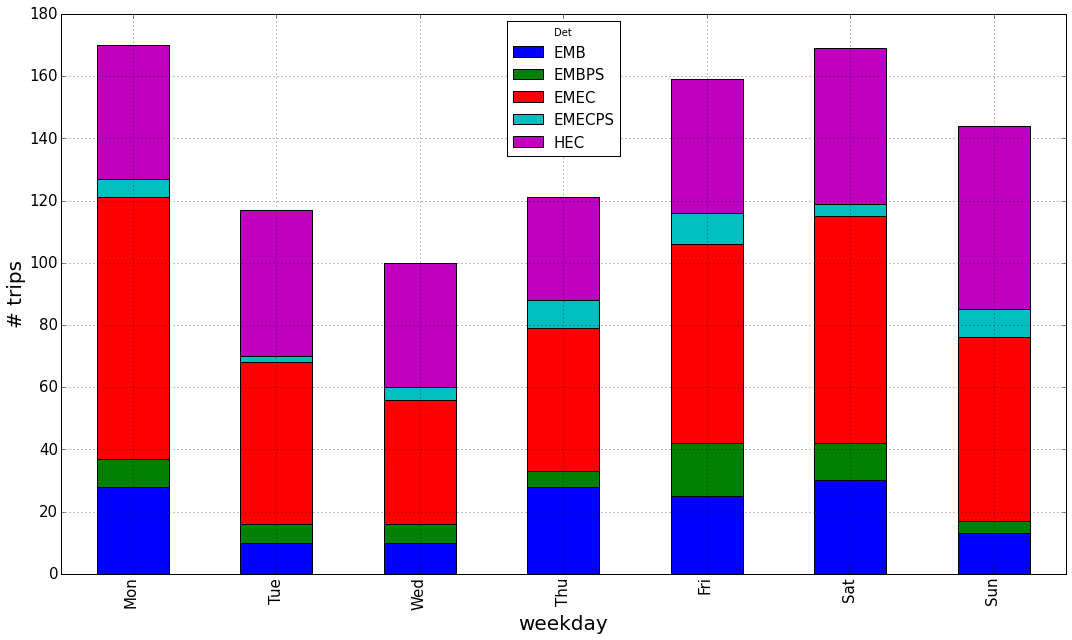

In [16]:
times = pd.DatetimeIndex(data["Trip TimeStamp"])
dg = data.groupby([times.weekday, "Det"])["Det"].count().unstack()

import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(15, 9))
dg.plot(kind='bar', ax=ax, stacked=True)
ax.set_ylabel("# trips")
ax.set_xlabel("weekday")
ax.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])

fig.tight_layout()
plt.show()